# PLE02: Gimnasio - EDA y Preprocesamiento de Datos

Autor: Hugo Iglesias Pombo  
Fecha: 23/10/2024    
Asignatura: Aprendizaje Automático  


### 1. Importación de librerías y dataset

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import plotly.express as px
import sklearn as sk
from IPython.display import display

In [42]:
# Importamos el dataset
df = pd.read_csv('ple02_gimnasio.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [43]:
columnas = {
    'Age': 'Edad',
    'Gender': 'Género',
    'Weight (kg)': 'Peso',
    'Height (m)': 'Altura',
    'Max_BPM': 'BPM_Max',
    'Avg_BPM': 'BPM_Promedio',
    'Resting_BPM': 'BPM_Reposo',
    'Session_Duration (hours)': 'Duración_Sesión',
    'Calories_Burned': 'Calorías_Quemadas',
    'Workout_Type': 'Tipo_Entrenamiento',
    'Fat_Percentage': 'Porcentaje_Grasa',
    'Water_Intake (liters)': 'Ingesta_Agua',
    'Workout_Frequency (days/week)': 'Frecuencia_Entrenamiento',
    'Experience_Level': 'Nivel_Experiencia',
    'BMI': 'IMC'
}

In [44]:
df = df.rename(columns=columnas)
df.head()

,Edad,Género,Peso,Altura,BPM_Max,BPM_Promedio,BPM_Reposo,Duración_Sesión,Calorías_Quemadas,Tipo_Entrenamiento,Porcentaje_Grasa,Ingesta_Agua,Frecuencia_Entrenamiento,Nivel_Experiencia,IMC
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


##### Pasar variables categóricas como dummies

In [45]:
# pasar la columna tipo de entrenamiento como dummy
df = pd.get_dummies(df, columns=['Género', 'Tipo_Entrenamiento'])

In [46]:
#renombro las columnas de genero para que esten en español y acorto el nombre de las columnas de tipo de entrenamiento
columnas_modificar = {'Género_Female': 'Mujer', 'Género_Male': 'Hombre', 'Tipo_Entrenamiento_Cardio': 'Cardio', 'Tipo_Entrenamiento_Strength': 'Fuerza', 'Tipo_Entrenamiento_Yoga': 'Yoga', 'Tipo_Entrenamiento_HIIT': 'HIIT'}

df = df.rename(columns=columnas_modificar)

df.head()

,Edad,Peso,Altura,BPM_Max,BPM_Promedio,BPM_Reposo,Duración_Sesión,Calorías_Quemadas,Porcentaje_Grasa,Ingesta_Agua,Frecuencia_Entrenamiento,Nivel_Experiencia,IMC,Mujer,Hombre,Cardio,HIIT,Fuerza,Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,False,True,False,False,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,True,False,False,True,False,False
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,True,False,True,False,False,False
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,False,True,False,False,True,False
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,False,True,False,False,True,False


### 2. EDA

##### Estructura de los datos (Dimensiones, tipos, etc.)

In [47]:
print(f"Dimensiones (filas y columnas:)\n{df.shape}\n") #.shape nos da las dimensiones del conjunto de datos
print(f"Tipo de datos:\n{df.dtypes}\n")
print(f"Columnas:\n{df.columns}\n")

Dimensiones (filas y columnas:)
(973, 19)

Tipo de datos:
Edad                          int64
Peso                        float64
Altura                      float64
BPM_Max                       int64
BPM_Promedio                  int64
BPM_Reposo                    int64
Duración_Sesión             float64
Calorías_Quemadas           float64
Porcentaje_Grasa            float64
Ingesta_Agua                float64
Frecuencia_Entrenamiento      int64
Nivel_Experiencia             int64
IMC                         float64
Mujer                          bool
Hombre                         bool
Cardio                         bool
HIIT                           bool
Fuerza                         bool
Yoga                           bool
dtype: object

Columnas:
Index(['Edad', 'Peso', 'Altura', 'BPM_Max', 'BPM_Promedio', 'BPM_Reposo',
       'Duración_Sesión', 'Calorías_Quemadas', 'Porcentaje_Grasa',
       'Ingesta_Agua', 'Frecuencia_Entrenamiento', 'Nivel_Experiencia', 'IMC',
       'Mujer

##### Estadísticas descriptivas. Resumen estadístico de las variables numéricas.

In [48]:
#Estadísticas descriptivas. Resumen estadístico de las variables numéricas.
estadisticas_descriptivas = df.describe()

print("Estadísticas descriptivas:")
display(estadisticas_descriptivas)

Estadísticas descriptivas:


,Edad,Peso,Altura,BPM_Max,BPM_Promedio,BPM_Reposo,Duración_Sesión,Calorías_Quemadas,Porcentaje_Grasa,Ingesta_Agua,Frecuencia_Entrenamiento,Nivel_Experiencia,IMC
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [49]:
#Recuento de valores únicos en el dataset
print(f"Recuento de valores únicos en el dataset:\n{df.nunique()}\n")

Recuento de valores únicos en el dataset:
Edad                         42
Peso                        532
Altura                       51
BPM_Max                      40
BPM_Promedio                 50
BPM_Reposo                   25
Duración_Sesión             147
Calorías_Quemadas           621
Porcentaje_Grasa            239
Ingesta_Agua                 23
Frecuencia_Entrenamiento      4
Nivel_Experiencia             3
IMC                         771
Mujer                         2
Hombre                        2
Cardio                        2
HIIT                          2
Fuerza                        2
Yoga                          2
dtype: int64



In [50]:
#Comprobación de valores nulos en el dataset
print(f"Recuento de valores nulos en el dataset:\n{df.isnull().sum()}\n")

#Comprobación de valores duplicados en el dataset
print(f"Recuento de valores duplicados en el dataset:\n{df.duplicated().sum()}\n")

Recuento de valores nulos en el dataset:
Edad                        0
Peso                        0
Altura                      0
BPM_Max                     0
BPM_Promedio                0
BPM_Reposo                  0
Duración_Sesión             0
Calorías_Quemadas           0
Porcentaje_Grasa            0
Ingesta_Agua                0
Frecuencia_Entrenamiento    0
Nivel_Experiencia           0
IMC                         0
Mujer                       0
Hombre                      0
Cardio                      0
HIIT                        0
Fuerza                      0
Yoga                        0
dtype: int64

Recuento de valores duplicados en el dataset:
0



##### VARIABLES NUMÉRICAS

In [51]:
#cols_numericas = ['Edad', 'Peso (kg)', 'Altura (m)', 'BPM_Max', 'BPM_Promedio', 'BPM_Reposo', 'Duración_Sesión (horas)', 'Calorías_Quemadas', 'Porcentaje_Grasa', 'Ingesta_Agua (litros)', 'Frecuencia_Entrenamiento (días/semana)', 'Nivel_Experiencia', 'IMC']


##### GRÁFICO DE CAJA

En un _boxplot_ (o diagrama de caja y bigotes) de datos estandarizados, los valores también deberían estar mayormente dentro del rango de −3 a +3, debido a la forma en que la estandarización transforma los datos.

__Partes clave de un boxplot:__

    - Caja (box): Representa el rango intercuartílico (IQR), que contiene el 50% central de los datos. Esto significa que la caja va desde el primer cuartil (Q1, 25%) hasta el tercer cuartil (Q3, 75%).

    - Línea dentro de la caja: Representa la mediana (o cuartil 2, el 50%).

    - Bigotes: Se extienden desde los extremos de la caja hasta el valor más pequeño o más grande que no se considera un outlier. Los valores dentro de los bigotes son generalmente considerados normales.

    - Puntos fuera de los bigotes: Representan valores atípicos o outliers.

__Interpretación de un boxplot de datos estandarizados:__

    - Mediana: En los datos estandarizados, la mediana (línea dentro de la caja) debería estar cerca de 0, ya que la estandarización ajusta la media a 0.

    - Caja y bigotes: La mayoría de los datos deberían estar dentro del rango de −3 a +3 porque en una distribución normal estandarizada, casi el 99.7% de los datos están dentro de este rango.

    - Outliers: Cualquier valor que esté fuera de este rango, particularmente más allá de ±3 ±3, es considerado un outlier o valor atípico. Estos valores son puntos fuera de los bigotes y pueden señalar datos inusuales o extremos.

__¿Por qué −3 a +3?__

En datos estandarizados, los valores que están a más de 3 desviaciones estándar de la media son extremadamente raros (alrededor del 0.3% de los datos en una distribución normal). En un boxplot de datos estandarizados, esto significa que si un punto cae fuera de ese rango, es un indicador de que podría ser un outlier.

__Resumen visual en un boxplot estandarizado:__

La caja y los bigotes se ajustarán a mostrar la mayoría de los datos dentro del rango de −3 a +3.

Si hay outliers fuera de este rango, deberían aparecer como puntos sueltos por encima o por debajo del boxplot. Estos valores pueden ser considerados potenciales valores atípicos y merecen mayor atención.

##### Utilizamos los gráficos de caja para la localización de datos atípicos

<Axes: title={'center': 'Edad'}>

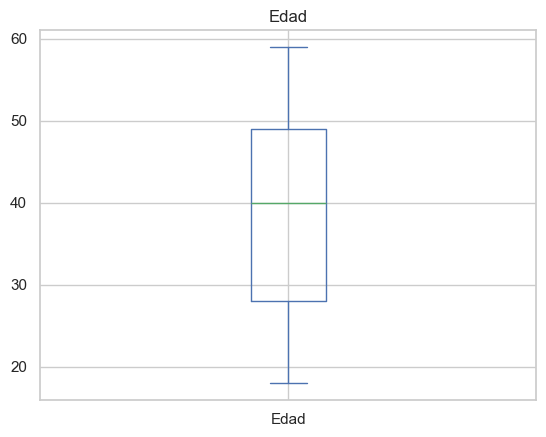

In [52]:
# boxplot de las variables

df['Edad'].plot(kind='box', title='Edad')

<Axes: title={'center': 'Peso'}>

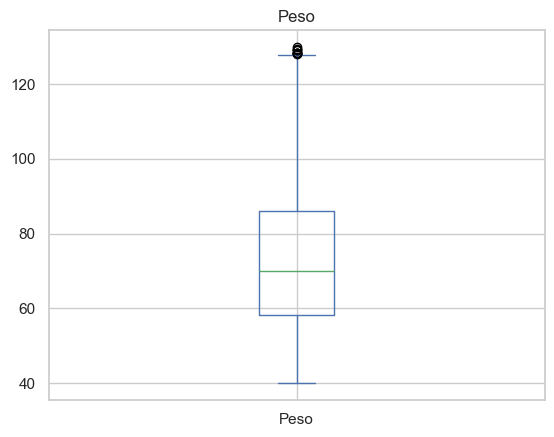

In [53]:
# boxplot de las variables
df['Peso'].plot(kind='box', title='Peso')

<Axes: title={'center': 'Altura'}>

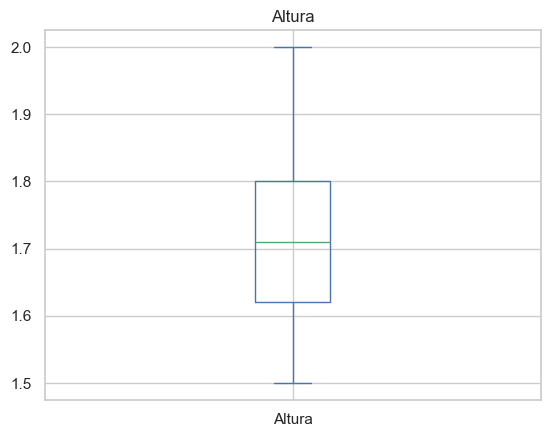

In [54]:
# boxplot de las variables
df['Altura'].plot(kind='box', title='Altura')

<Axes: title={'center': 'BPM_Max'}>

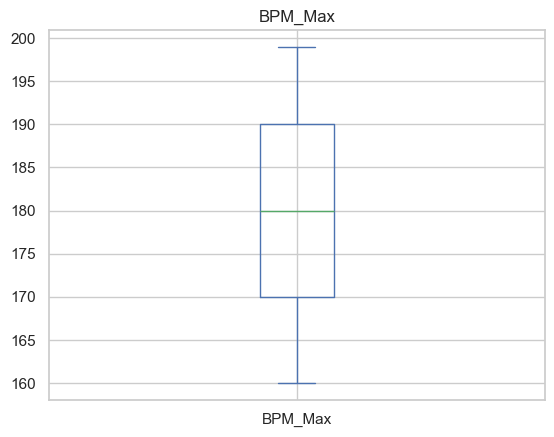

In [55]:
# boxplot de las variables
df['BPM_Max'].plot(kind='box', title='BPM_Max')

<Axes: title={'center': 'BPM_Promedio'}>

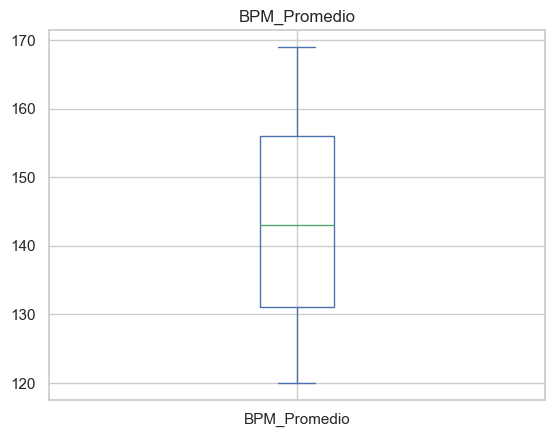

In [56]:
# boxplot de las variables
df['BPM_Promedio'].plot(kind='box', title='BPM_Promedio')

<Axes: title={'center': 'BPM_Reposo'}>

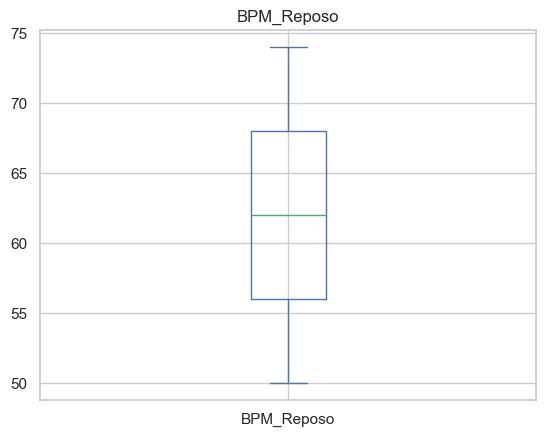

In [57]:
# boxplot de las variables
df['BPM_Reposo'].plot(kind='box', title='BPM_Reposo')

<Axes: title={'center': 'Duración_Sesión'}>

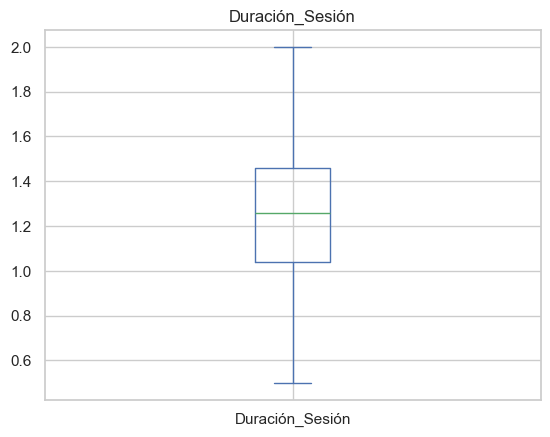

In [58]:
# boxplot de las variables
df['Duración_Sesión'].plot(kind='box', title='Duración_Sesión')

<Axes: title={'center': 'Calorías_Quemadas'}>

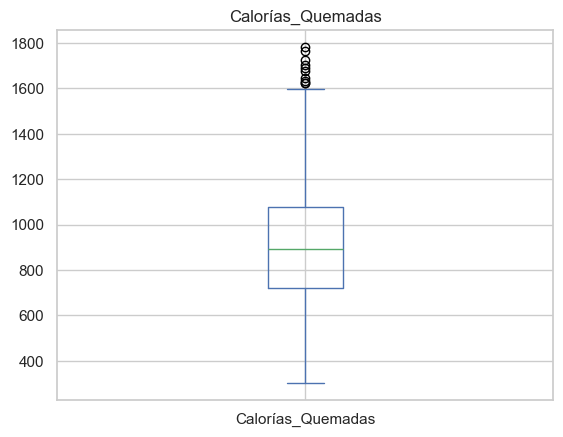

In [59]:
# boxplot de las variables
df['Calorías_Quemadas'].plot(kind='box', title='Calorías_Quemadas')


<Axes: title={'center': 'Porcentaje_Grasa'}>

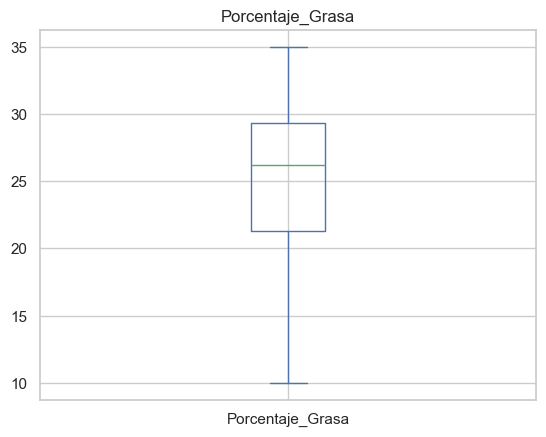

In [60]:
# boxplot de las variables
df['Porcentaje_Grasa'].plot(kind='box', title='Porcentaje_Grasa')

<Axes: title={'center': 'Ingesta_Agua'}>

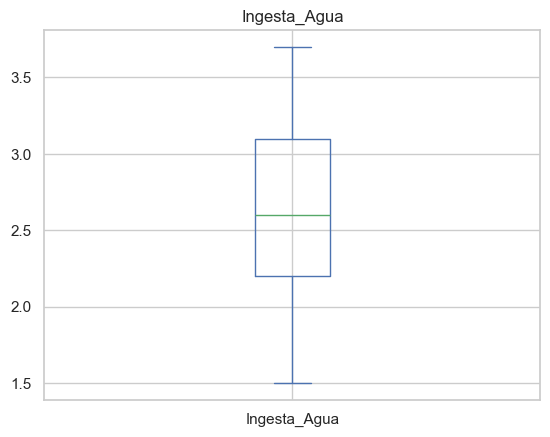

In [61]:
# boxplot de las variables
df['Ingesta_Agua'].plot(kind='box', title='Ingesta_Agua')

<Axes: title={'center': 'Frecuencia_Entrenamiento'}>

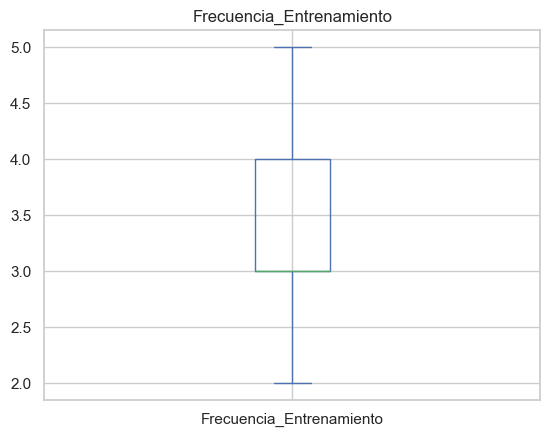

In [62]:
# boxplot de las variables
df['Frecuencia_Entrenamiento'].plot(kind='box', title='Frecuencia_Entrenamiento')

<Axes: title={'center': 'IMC'}>

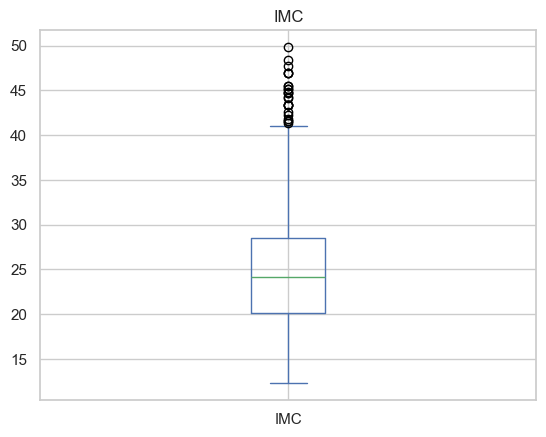

In [63]:
# boxplot de las variables
df['IMC'].plot(kind='box', title='IMC')

<Axes: title={'center': 'Nivel_Experiencia'}>

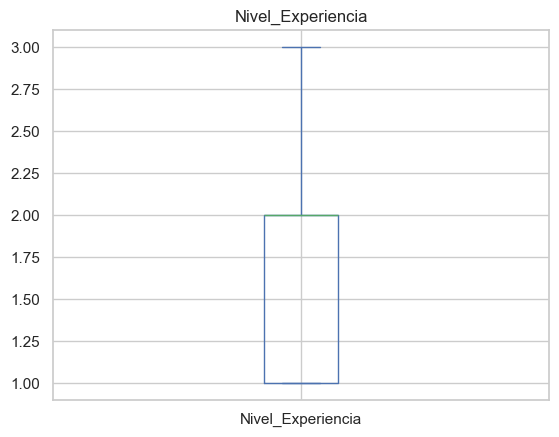

In [64]:
# boxplot de las variables
df['Nivel_Experiencia'].plot(kind='box', title='Nivel_Experiencia')

Se hacen los gráficos de caja para cada variable numérica porque las escalas de las variables son diferentes y no se puede ver correctamente en un solo gráfico.

##### Tratamiento de datos atípicos

En los boxplot se observan posibles datos atípicos en las variables Peso, IMC y Calorías_Quemadas. 

In [65]:
# Función que indica si se ha eliminado algún valor atípico
def detectar_eliminado_atipicos(df1, df2):
    if df1.shape[0] == df2.shape[0]:
        print("No se han eliminado valores atípicos extremos.")
    else:
        print("Se han eliminado valores atípicos extremos.")
        print(f"El dataframe original tenía {df1.shape[0]} filas y el nuevo tiene {df2.shape[0]} filas.")


In [66]:
# Realizamos una copia del dataset por si necesitamos volver a cargar los datos originales
df_c1 = df.copy()

# Columnas de interés (excluyendo las columnas booleanas porque tengo la certeza de que no tienen valores atípicos por los análisis previos)
columnas_interes = df_c1.select_dtypes(exclude=['bool']).columns

# Calcular Q1 (primer cuartil, 25% de los datos) y Q3 (tercer cuartil, 75% de los datos)
Q1 = df_c1[columnas_interes].quantile(0.25)
Q3 = df_c1[columnas_interes].quantile(0.75)

# Calcular IQR (Rango Intercuartílico), que es la diferencia entre Q3 y Q1
IQR = Q3 - Q1

# Definir límites superior e inferior de tolerancia para los valores atípicos
limite_inferior = Q1 - 1.3 * IQR
limite_superior = Q3 + 1.3 * IQR

# Detectar y eliminar los valores atípicos que estén por debajo del límite inferior o por encima del límite superior
condicion = (df_c1[columnas_interes] >= limite_inferior) & (df_c1[columnas_interes] <= limite_superior)
df_sin_val_atipicos = df_c1[condicion.all(axis=1)]

# Mostrar estadísticas de los datos originales y sin valores atípicos
estadisticas_originales = df_c1.describe()
estadisticas_sin_atipicos = df_sin_val_atipicos.describe()

print("Estadísticas de los datos originales:")
display(estadisticas_originales)

print("Estadísticas de los datos sin valores atípicos:")
display(estadisticas_sin_atipicos)

# Llamar a la función para detectar y eliminar valores atípicos
detectar_eliminado_atipicos(df_c1, df_sin_val_atipicos)

Estadísticas de los datos originales:


,Edad,Peso,Altura,BPM_Max,BPM_Promedio,BPM_Reposo,Duración_Sesión,Calorías_Quemadas,Porcentaje_Grasa,Ingesta_Agua,Frecuencia_Entrenamiento,Nivel_Experiencia,IMC
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


Estadísticas de los datos sin valores atípicos:


,Edad,Peso,Altura,BPM_Max,BPM_Promedio,BPM_Reposo,Duración_Sesión,Calorías_Quemadas,Porcentaje_Grasa,Ingesta_Agua,Frecuencia_Entrenamiento,Nivel_Experiencia,IMC
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,38.733483,70.726764,1.719586,179.823068,143.295633,62.124300,1.247514,890.184770,25.418141,2.588018,3.294513,1.784994,23.934255
std,12.095591,18.325377,0.127834,11.547234,14.332141,7.384325,0.336046,256.790868,6.012782,0.596084,0.905602,0.731053,5.542095
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,303.000000,11.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,57.400000,1.620000,170.000000,131.000000,56.000000,1.040000,718.000000,21.600000,2.100000,3.000000,1.000000,19.720000
50%,40.000000,67.900000,1.710000,180.000000,142.000000,62.000000,1.260000,885.000000,26.600000,2.600000,3.000000,2.000000,23.790000
75%,49.000000,82.100000,1.790000,190.000000,156.000000,68.000000,1.450000,1056.000000,29.500000,3.000000,4.000000,2.000000,27.680000
max,59.000000,122.100000,2.000000,199.000000,169.000000,74.000000,1.990000,1536.000000,35.000000,3.700000,5.000000,3.000000,39.300000


Se han eliminado valores atípicos extremos.
El dataframe original tenía 973 filas y el nuevo tiene 893 filas.


In [67]:
# Tras comprobar que el procedimiento ha sido correcto, actualizamos el dataset 
df_c1 = df_sin_val_atipicos

In [68]:
corr_matrix = df_c1.corr()
corr_matrix

,Edad,Peso,Altura,BPM_Max,BPM_Promedio,BPM_Reposo,Duración_Sesión,Calorías_Quemadas,Porcentaje_Grasa,Ingesta_Agua,Frecuencia_Entrenamiento,Nivel_Experiencia,IMC,Mujer,Hombre,Cardio,HIIT,Fuerza,Yoga
Edad,1.000000,-0.060392,-0.025600,-0.027982,0.050800,0.008166,0.010533,-0.123271,-0.015453,0.057507,0.035217,0.009614,-0.036777,-0.029360,0.029360,-0.042021,0.022954,0.007100,0.013612
Peso,-0.060392,1.000000,0.418374,0.060858,-0.041460,-0.073109,0.019574,0.109005,-0.235649,0.407125,-0.006650,0.017074,0.810455,-0.549955,0.549955,0.051696,0.020774,-0.089859,0.018068
Altura,-0.025600,0.418374,1.000000,-0.020905,-0.007606,-0.020289,-0.025075,0.083783,-0.229002,0.405540,-0.029352,-0.031784,-0.179510,-0.612936,0.612936,-0.002010,-0.006878,-0.056329,0.065567
BPM_Max,-0.027982,0.060858,-0.020905,1.000000,-0.049500,0.028499,0.009923,-0.000499,-0.006509,0.023455,-0.032105,-0.004113,0.077229,-0.006137,0.006137,-0.002609,0.019408,-0.057418,0.041999
BPM_Promedio,0.050800,-0.041460,-0.007606,-0.049500,1.000000,0.059608,-0.015689,0.313198,0.035588,-0.037968,-0.038156,-0.029878,-0.042005,0.017678,-0.017678,0.007539,-0.004899,0.010481,-0.013566
BPM_Reposo,0.008166,-0.073109,-0.020289,0.028499,0.059608,1.000000,-0.029521,-0.000644,-0.008444,-0.007277,-0.025765,-0.005427,-0.065026,-0.003090,0.003090,-0.005005,0.049913,-0.010296,-0.032497
Duración_Sesión,0.010533,0.019574,-0.025075,0.009923,-0.015689,-0.029521,1.000000,0.907330,-0.560638,0.255563,0.629506,0.753565,0.037159,0.031246,-0.031246,-0.048778,0.039246,-0.012454,0.024588
Calorías_Quemadas,-0.123271,0.109005,0.083783,-0.000499,0.313198,-0.000644,0.907330,1.000000,-0.564988,0.320746,0.554031,0.677034,0.065687,-0.125135,0.125135,-0.026349,0.027610,-0.016417,0.016906
Porcentaje_Grasa,-0.015453,-0.235649,-0.229002,-0.006509,0.035588,-0.008444,-0.560638,-0.564988,1.000000,-0.571296,-0.506736,-0.631258,-0.115956,0.392306,-0.392306,0.027851,-0.039838,0.070217,-0.061025
Ingesta_Agua,0.057507,0.407125,0.405540,0.023455,-0.037968,-0.007277,0.255563,0.320746,-0.571296,1.000000,0.205085,0.273213,0.192848,-0.665668,0.665668,0.006172,0.018921,-0.065812,0.041991


relacionar peso y altura - > imc
dejar como está duración_sesión y nivel_experiencia porque nos interesa mantenerlas ya que nivel_experiencia está altamente correlada con calorias_quemadas que es la variable objetivo
hacer cribado de datos atipicos antes de matriz de correlacion
igual tiene sentido pasar las variables categóricas como género a numéricas (dummy) para ver si hay correlación con la variable objetivo
usar modelo de regresión lineal


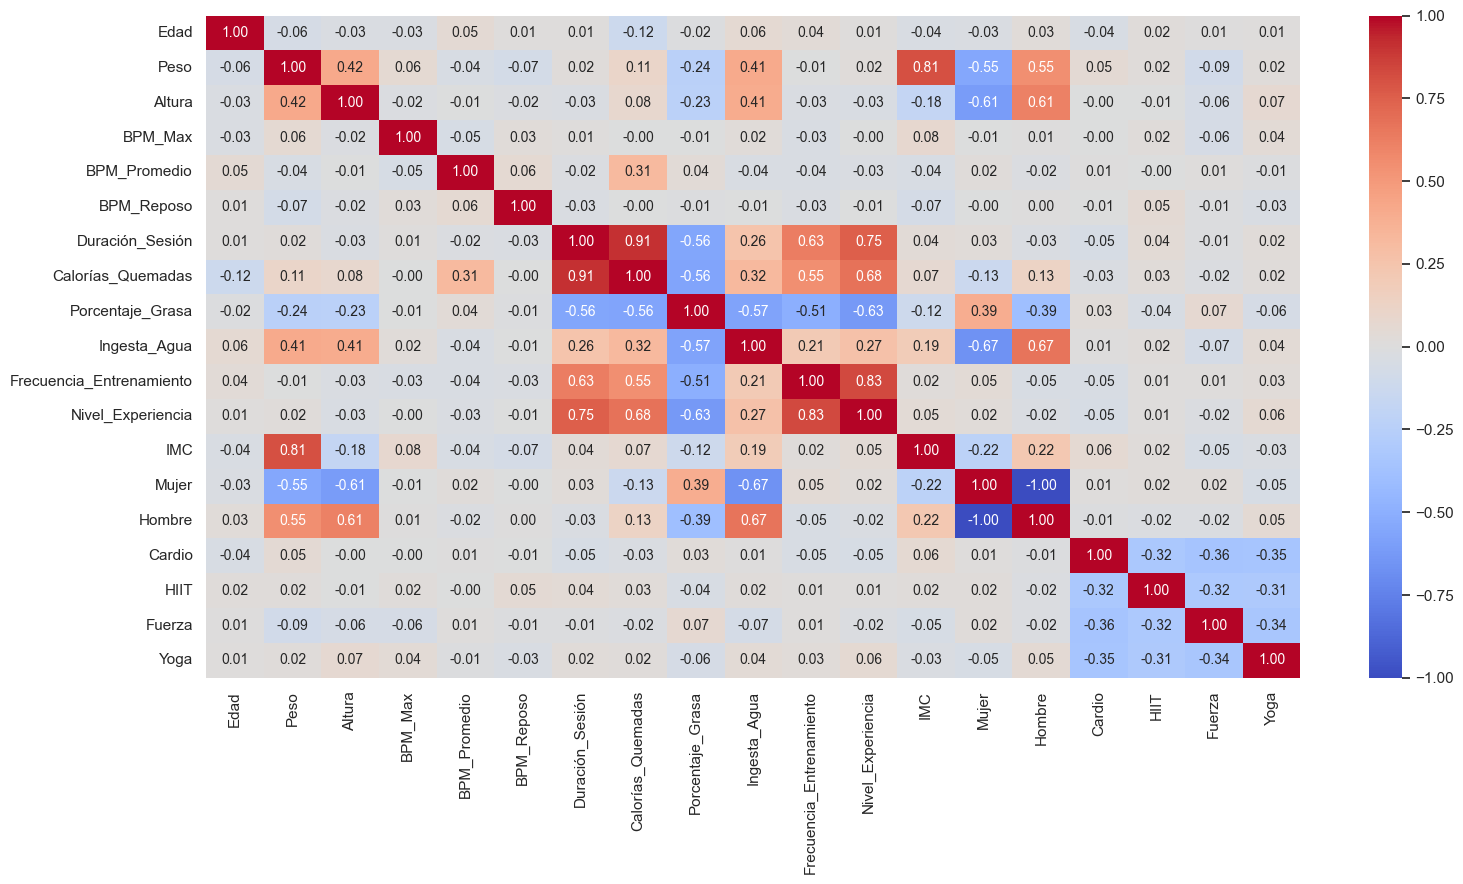

In [69]:
# Ajustar el tamaño de la figura antes de dibujar el mapa de calor
plt.figure(figsize=(16, 9))

# Dibujar el mapa de calor
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",  # Formato de los números
    annot_kws={"size": 10}  # Tamaño de la fuente de los números
)

# Ajustar automáticamente los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [70]:
#Convertimos las dummy en 0 y 1
df_c1['Hombre'] = df_c1['Hombre'].map({True: 1, False: 0})
df_c1['Mujer'] = df_c1['Mujer'].map({True: 1, False: 0})
df_c1['Cardio'] = df_c1['Cardio'].map({True: 1, False: 0})
df_c1['Fuerza'] = df_c1['Fuerza'].map({True: 1, False: 0})
df_c1['Yoga'] = df_c1['Yoga'].map({True: 1, False: 0})
df_c1['HIIT'] = df_c1['HIIT'].map({True: 1, False: 0})

#comprobamos que se haya hecho correctamente
df_c1.head()

,Edad,Peso,Altura,BPM_Max,BPM_Promedio,BPM_Reposo,Duración_Sesión,Calorías_Quemadas,Porcentaje_Grasa,Ingesta_Agua,Frecuencia_Entrenamiento,Nivel_Experiencia,IMC,Mujer,Hombre,Cardio,HIIT,Fuerza,Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,0,1,0,0,0,1
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,1,0,0,1,0,0
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,1,0,1,0,0,0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,0,1,0,0,1,0
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,0,1,0,0,1,0


##### ELIMINACIÓN DE DATOS QUE NO APORTAN VALOR
En el gráfico de correlaciones superior se observa que la variable "Peso" está altamente correlada con la variable "IMC" (índice de masa corporal).

In [71]:
# Eliminamos las columnas de las variables Peso y Altura
df_c1 = df_c1.drop(columns=['Peso', 'Altura'])

### Eliminacion de variables poco correlacionadas

In [72]:
# Eliminamos las variables que no aportan información relevante
df_c1 = df_c1.drop(columns=['BPM_Max', 'BPM_Reposo', 'HIIT', 'Yoga', 'Fuerza', 'Cardio'])

#### NORMALIZACIÓN

In [73]:
# Normalizamos por SciKit Learn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_c1), columns=df_c1.columns)

In [74]:
# COMPROBACIÓN DE QUE LOS VALORES ESTÁN NORMALIZADOS
# Crear un DataFrame con los valores máximos y mínimos
resultados_norm = pd.DataFrame({
    'Máximo': df_norm.max(),
    'Mínimo': df_norm.min(),
    'Media': df_norm.mean()
})

from IPython.display import display

display(resultados_norm)

,Máximo,Mínimo,Media
Edad,1.0,0.0,0.505695
BPM_Promedio,1.0,0.0,0.475421
Duración_Sesión,1.0,0.0,0.501687
Calorías_Quemadas,1.0,0.0,0.476224
Porcentaje_Grasa,1.0,0.0,0.600756
Ingesta_Agua,1.0,0.0,0.494554
Frecuencia_Entrenamiento,1.0,0.0,0.431504
Nivel_Experiencia,1.0,0.0,0.392497
IMC,1.0,0.0,0.430476
Mujer,1.0,0.0,0.515118


##### ANÁLISIS ESTADÍSTICO

In [75]:
df_norm.describe()

,Edad,BPM_Promedio,Duración_Sesión,Calorías_Quemadas,Porcentaje_Grasa,Ingesta_Agua,Frecuencia_Entrenamiento,Nivel_Experiencia,IMC,Mujer,Hombre
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,0.505695,0.475421,0.501687,0.476224,0.600756,0.494554,0.431504,0.392497,0.430476,0.515118,0.484882
std,0.295014,0.292493,0.225534,0.208265,0.250533,0.270947,0.301867,0.365526,0.205415,0.500051,0.500051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243902,0.224490,0.362416,0.336577,0.441667,0.272727,0.333333,0.000000,0.274277,0.000000,0.000000
50%,0.536585,0.448980,0.510067,0.472019,0.650000,0.500000,0.333333,0.500000,0.425130,1.000000,0.000000
75%,0.756098,0.734694,0.637584,0.610706,0.770833,0.681818,0.666667,0.500000,0.569311,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### ESTANDARIZACIÓN

In [76]:
df_standar = df_norm.copy()

# ESTANDARIZACIÓN CON SCIKIT LEARN - StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standar= scaler.fit_transform(df_standar)


In [77]:
# COMPROBACIÓN DE QUE LOS VALORES ESTÁN ESTANDARIZADOS

# Convertir df_standar a DataFrame de pandas
df_standar = pd.DataFrame(df_standar, columns=df_c1.columns)

# Crear un DataFrame con los valores de la media, desviación típica, máximo y mínimo
resultados_estandar = pd.DataFrame({
    'Media': df_standar.mean(),
    'Desviación Típica': df_standar.std(),
    'Máximo': df_standar.max(),
    'Mínimo': df_standar.min()
}, index=df_standar.columns)
display(resultados_estandar)

,Media,Desviación Típica,Máximo,Mínimo
Edad,2.387042e-17,1.00056,1.676468,-1.715096
BPM_Promedio,1.233305e-16,1.00056,1.794482,-1.626323
Duración_Sesión,2.247798e-16,1.00056,2.210715,-2.225685
Calorías_Quemadas,2.566070e-16,1.00056,2.516356,-2.287908
Porcentaje_Grasa,6.096902e-16,1.00056,1.594475,-2.399259
Ingesta_Agua,5.370844e-17,1.00056,1.866525,-1.826300
Frecuencia_Entrenamiento,6.365444e-17,1.00056,1.884318,-1.430251
Nivel_Experiencia,-5.768684e-17,1.00056,1.662926,-1.074388
IMC,1.452117e-16,1.00056,2.774105,-2.096818
Mujer,-1.859903e-16,1.00056,0.970208,-1.030706


In [78]:
df_standar = pd.DataFrame(df_standar, columns=df_c1.columns) #Lo paso otra vez como dataframe de pandas porque si no me da error en el describe
df_standar.describe()


,Edad,BPM_Promedio,Duración_Sesión,Calorías_Quemadas,Porcentaje_Grasa,Ingesta_Agua,Frecuencia_Entrenamiento,Nivel_Experiencia,IMC,Mujer,Hombre
count,8.930000e+02,8.930000e+02,8.930000e+02,8.930000e+02,8.930000e+02,8.930000e+02,8.930000e+02,8.930000e+02,8.930000e+02,8.930000e+02,8.930000e+02
mean,2.387042e-17,1.233305e-16,2.247798e-16,2.566070e-16,6.096902e-16,5.370844e-17,6.365444e-17,-5.768684e-17,1.452117e-16,-1.859903e-16,6.962205e-18
std,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00
min,-1.715096e+00,-1.626323e+00,-2.225685e+00,-2.287908e+00,-2.399259e+00,-1.826300e+00,-1.430251e+00,-1.074388e+00,-2.096818e+00,-1.030706e+00,-9.702084e-01
25%,-8.878853e-01,-8.583870e-01,-6.178625e-01,-6.709010e-01,-6.353599e-01,-8.191657e-01,-3.253944e-01,-1.074388e+00,-7.608344e-01,-1.030706e+00,-9.702084e-01
50%,1.047677e-01,-9.045116e-02,3.717644e-02,-2.020195e-02,1.966679e-01,2.011260e-02,-3.253944e-01,2.942689e-01,-2.604361e-02,9.702084e-01,-9.702084e-01
75%,8.492574e-01,8.869217e-01,6.028919e-01,6.460827e-01,6.792440e-01,6.915352e-01,7.794618e-01,2.942689e-01,6.762503e-01,9.702084e-01,1.030706e+00
max,1.676468e+00,1.794482e+00,2.210715e+00,2.516356e+00,1.594475e+00,1.866525e+00,1.884318e+00,1.662926e+00,2.774105e+00,9.702084e-01,1.030706e+00


##### VISUALIZAR LAS VARIABLES QUE QUEDAN EN EL MODELO

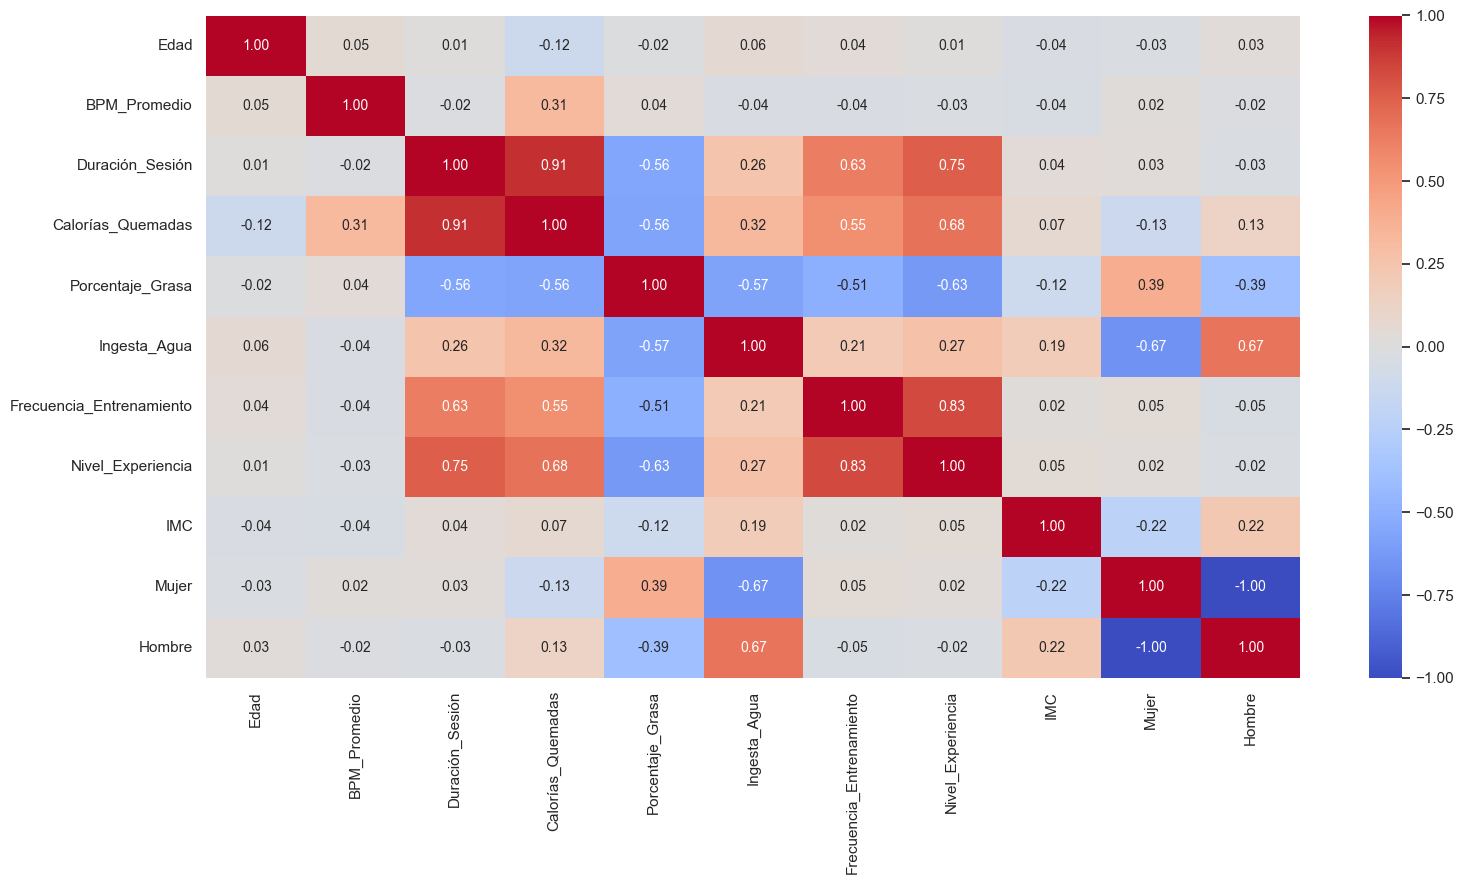

In [79]:
# Hacemos otro gráfico de correlación con los datos estandarizados
corr_matrix = df_standar.corr()

# Ajustar el tamaño de la figura antes de dibujar el mapa de calor
plt.figure(figsize=(16, 9))

# Dibujar el mapa de calor

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",  # Formato de los números
    annot_kws={"size": 10}  # Tamaño de la fuente de los números
)

# Ajustar automáticamente los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

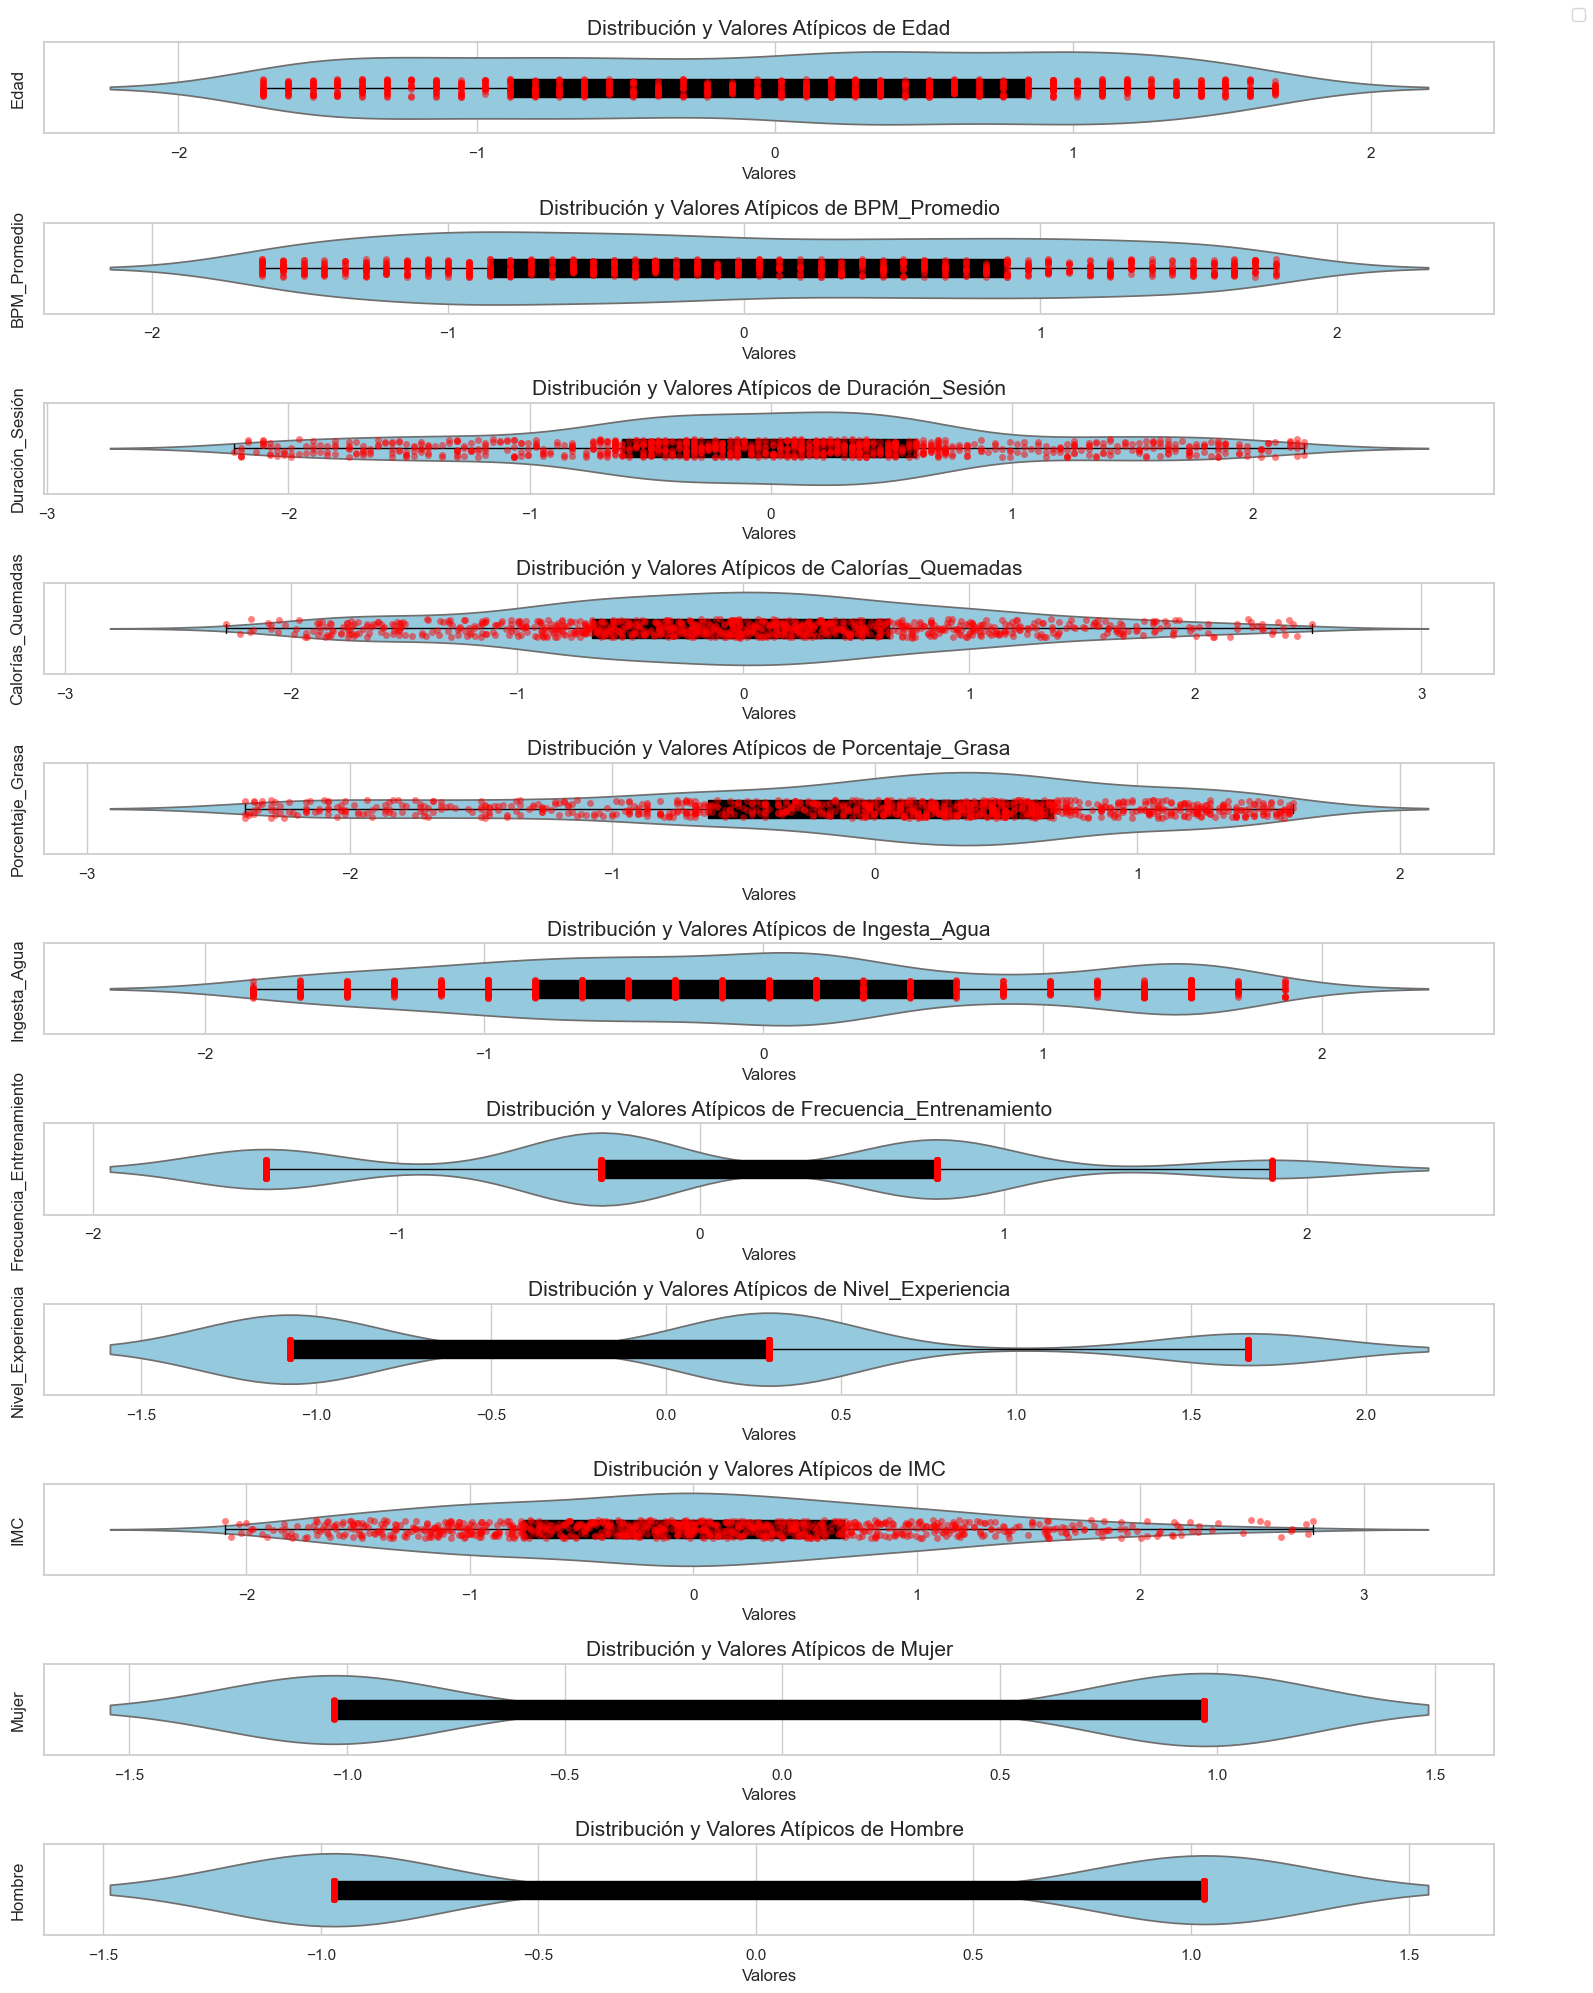

In [83]:
# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=len(df_standar.columns), ncols=1, figsize=(16, 20))

# Crear gráficos combinados de caja y violín para cada variable
for i, column in enumerate(df_standar.columns):
    sns.violinplot(x=df_standar[column], ax=axes[i], inner=None, color='skyblue')
    sns.boxplot(x=df_standar[column], ax=axes[i], whis=1.5, width=0.2, color='black')
    sns.stripplot(x=df_standar[column], ax=axes[i], color='red', alpha=0.5, jitter=True)
    axes[i].set_title(f'Distribución y Valores Atípicos de {column}', fontsize=15)
    axes[i].set_xlabel('Valores', fontsize=12)
    axes[i].set_ylabel(column, fontsize=12)

# Añadir una leyenda global
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Datos Atípicos'], loc='upper right', fontsize=12)

# Ajustar el layout
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Dejar espacio para la leyenda

# Mostrar el gráfico
plt.show()

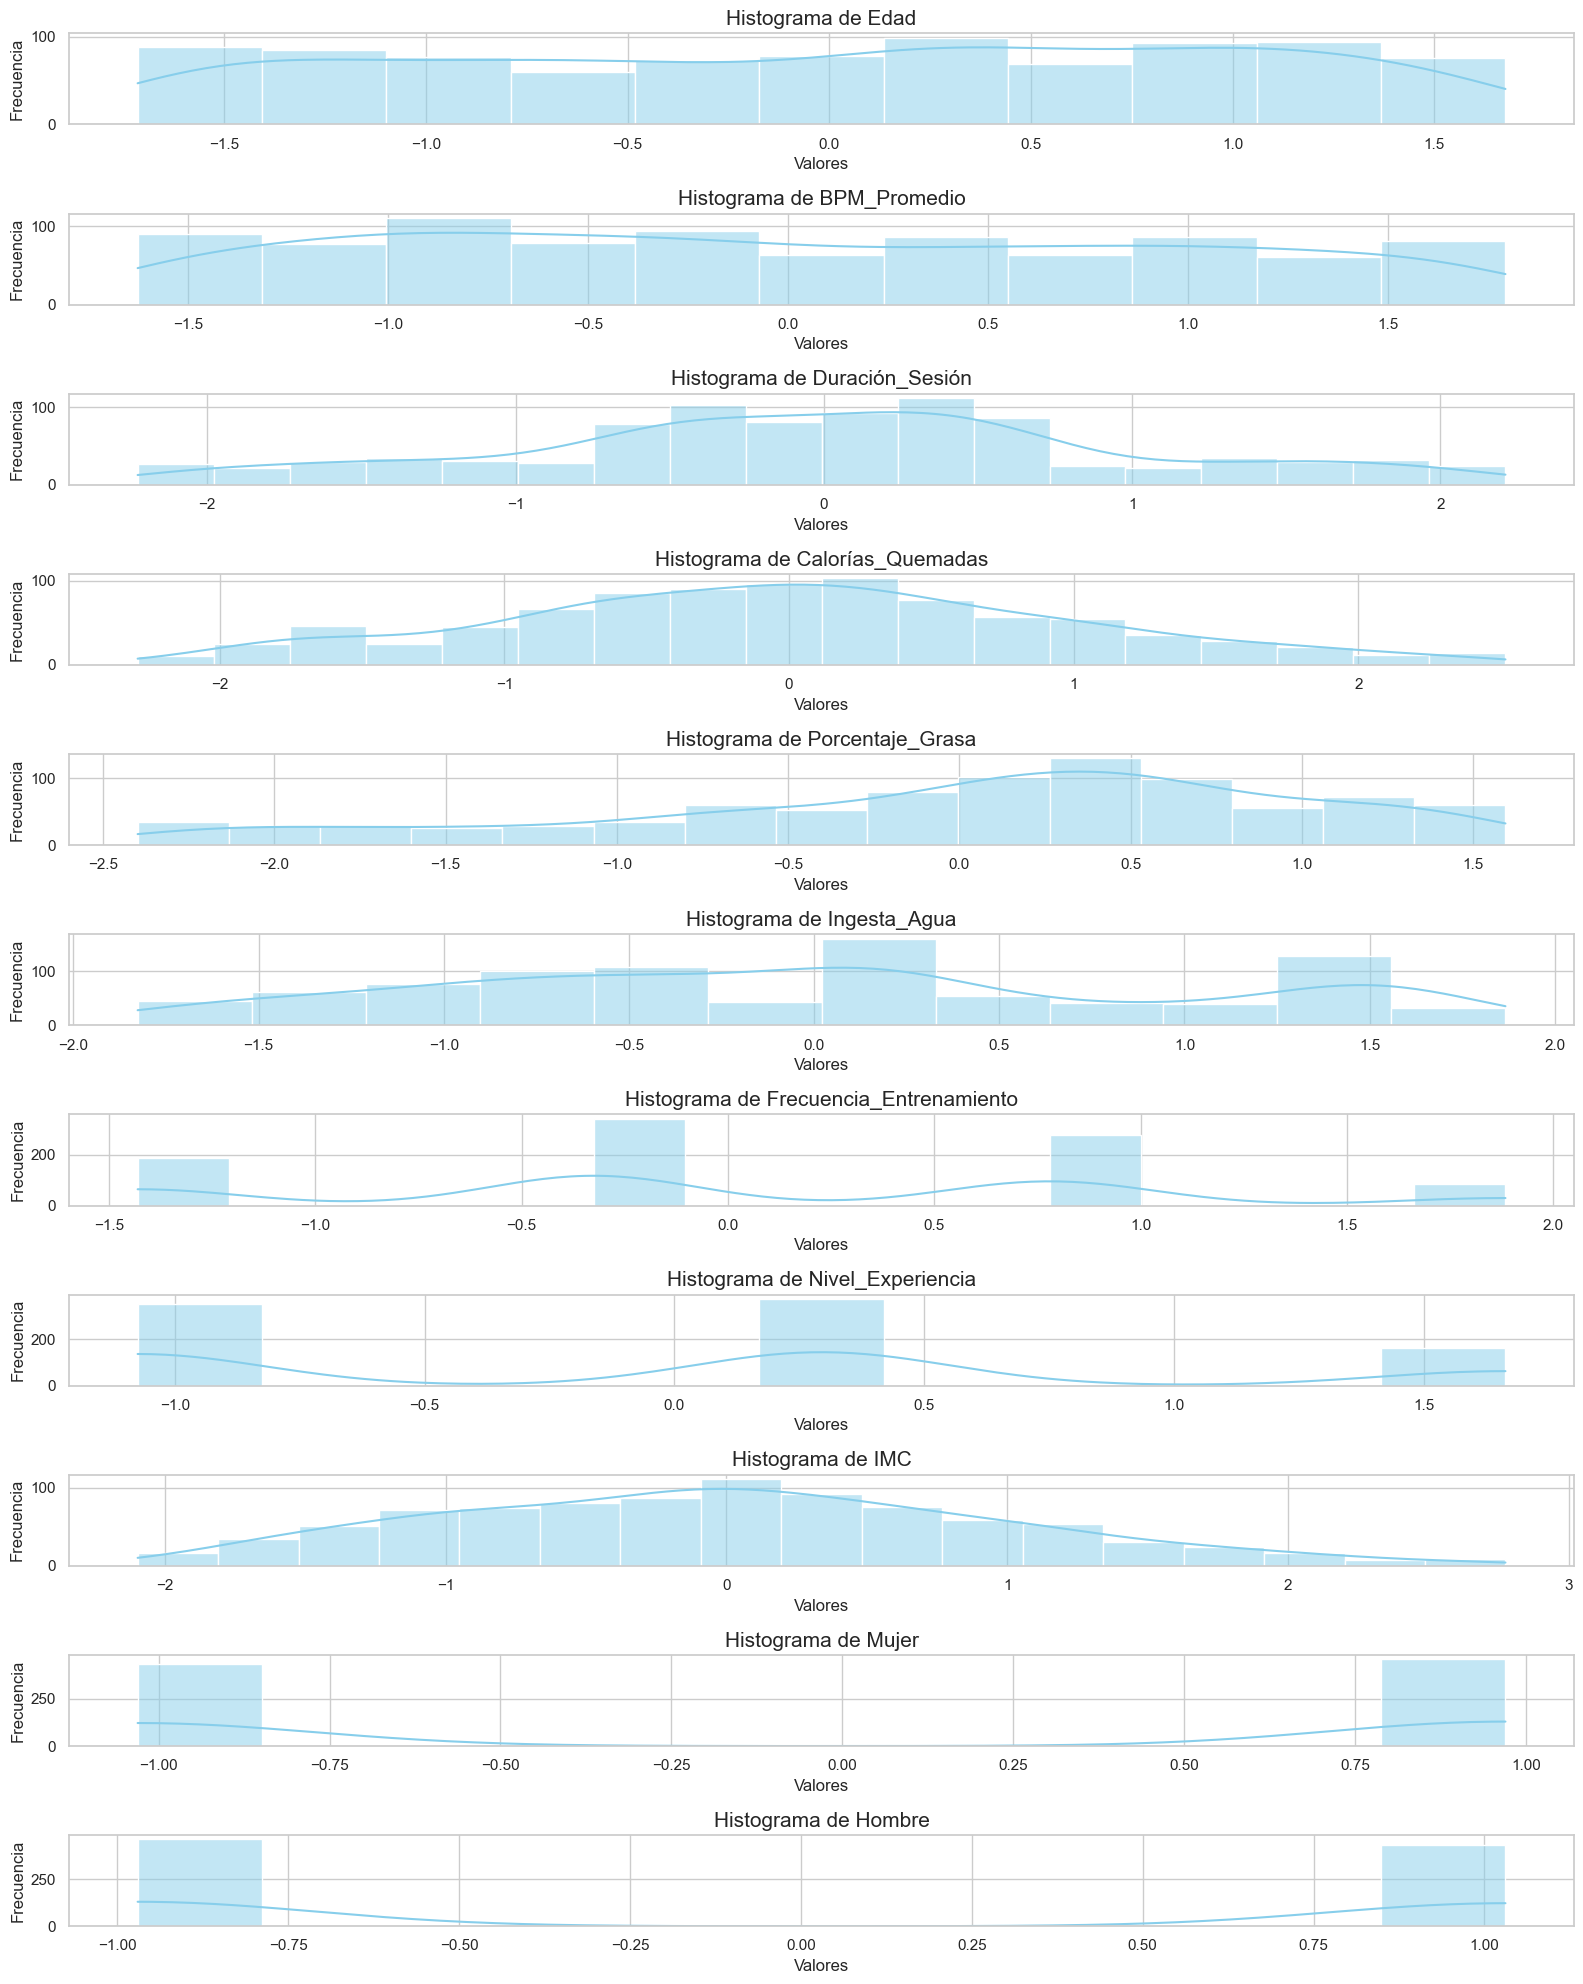

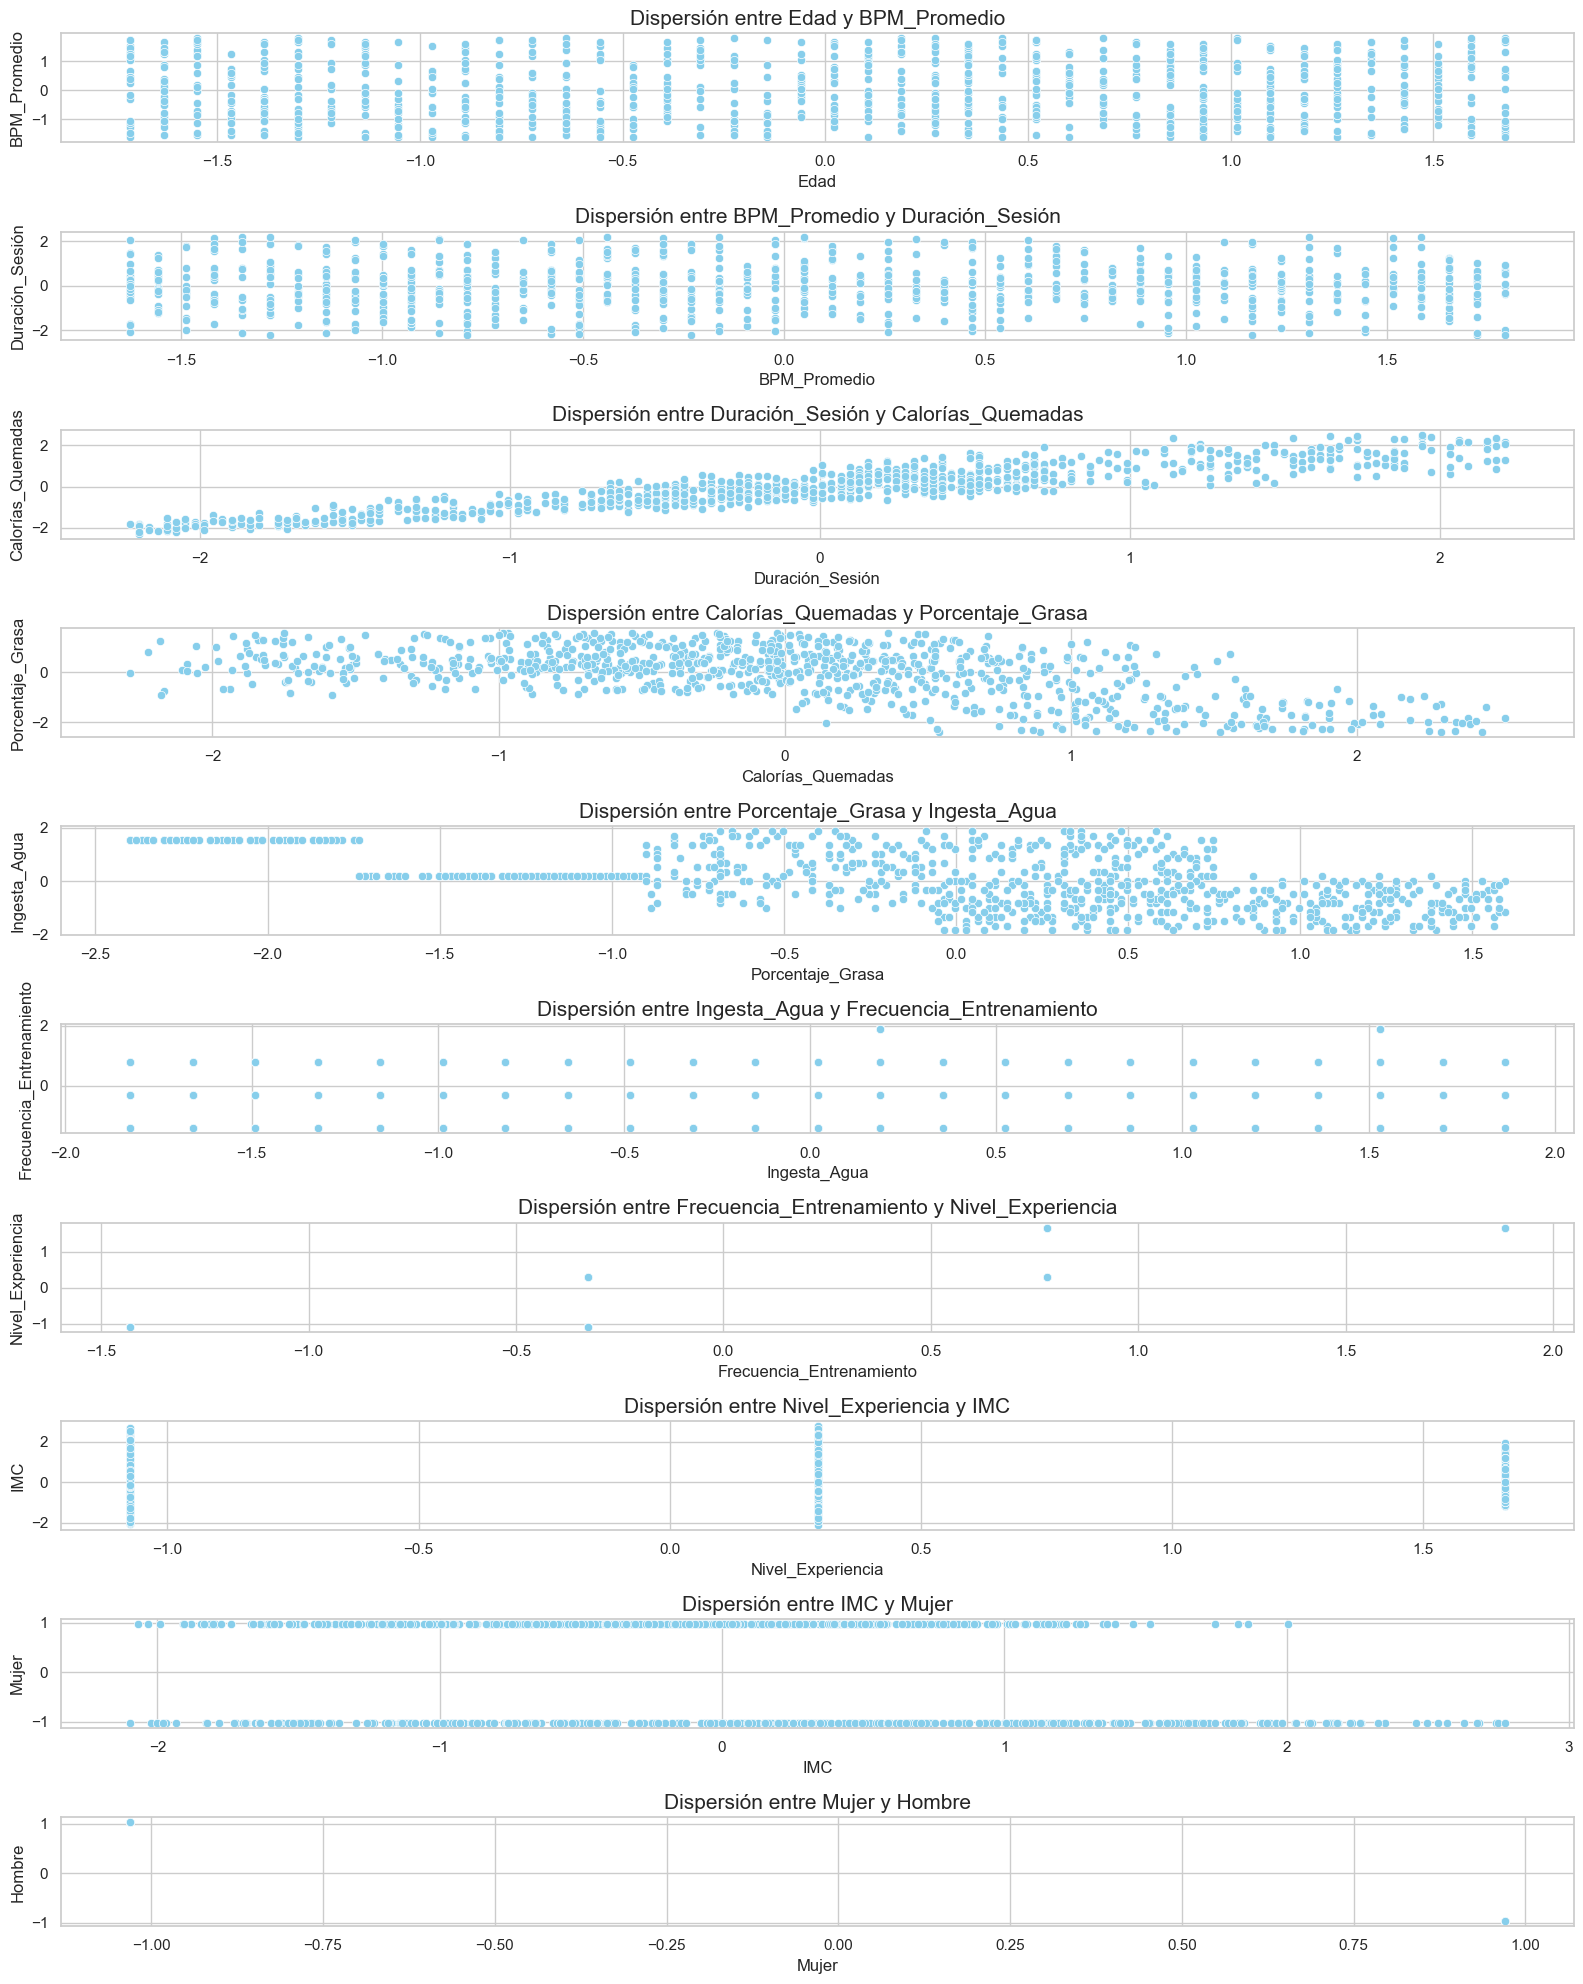

C:\Users\manue\AppData\Local\Temp\ipykernel_3376\397367313.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_standar[column].value_counts().index, y=df_standar[column].value_counts().values, ax=axes[i], palette='viridis')
C:\Users\manue\AppData\Local\Temp\ipykernel_3376\397367313.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_standar[column].value_counts().index, y=df_standar[column].value_counts().values, ax=axes[i], palette='viridis')
C:\Users\manue\AppData\Local\Temp\ipykernel_3376\397367313.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

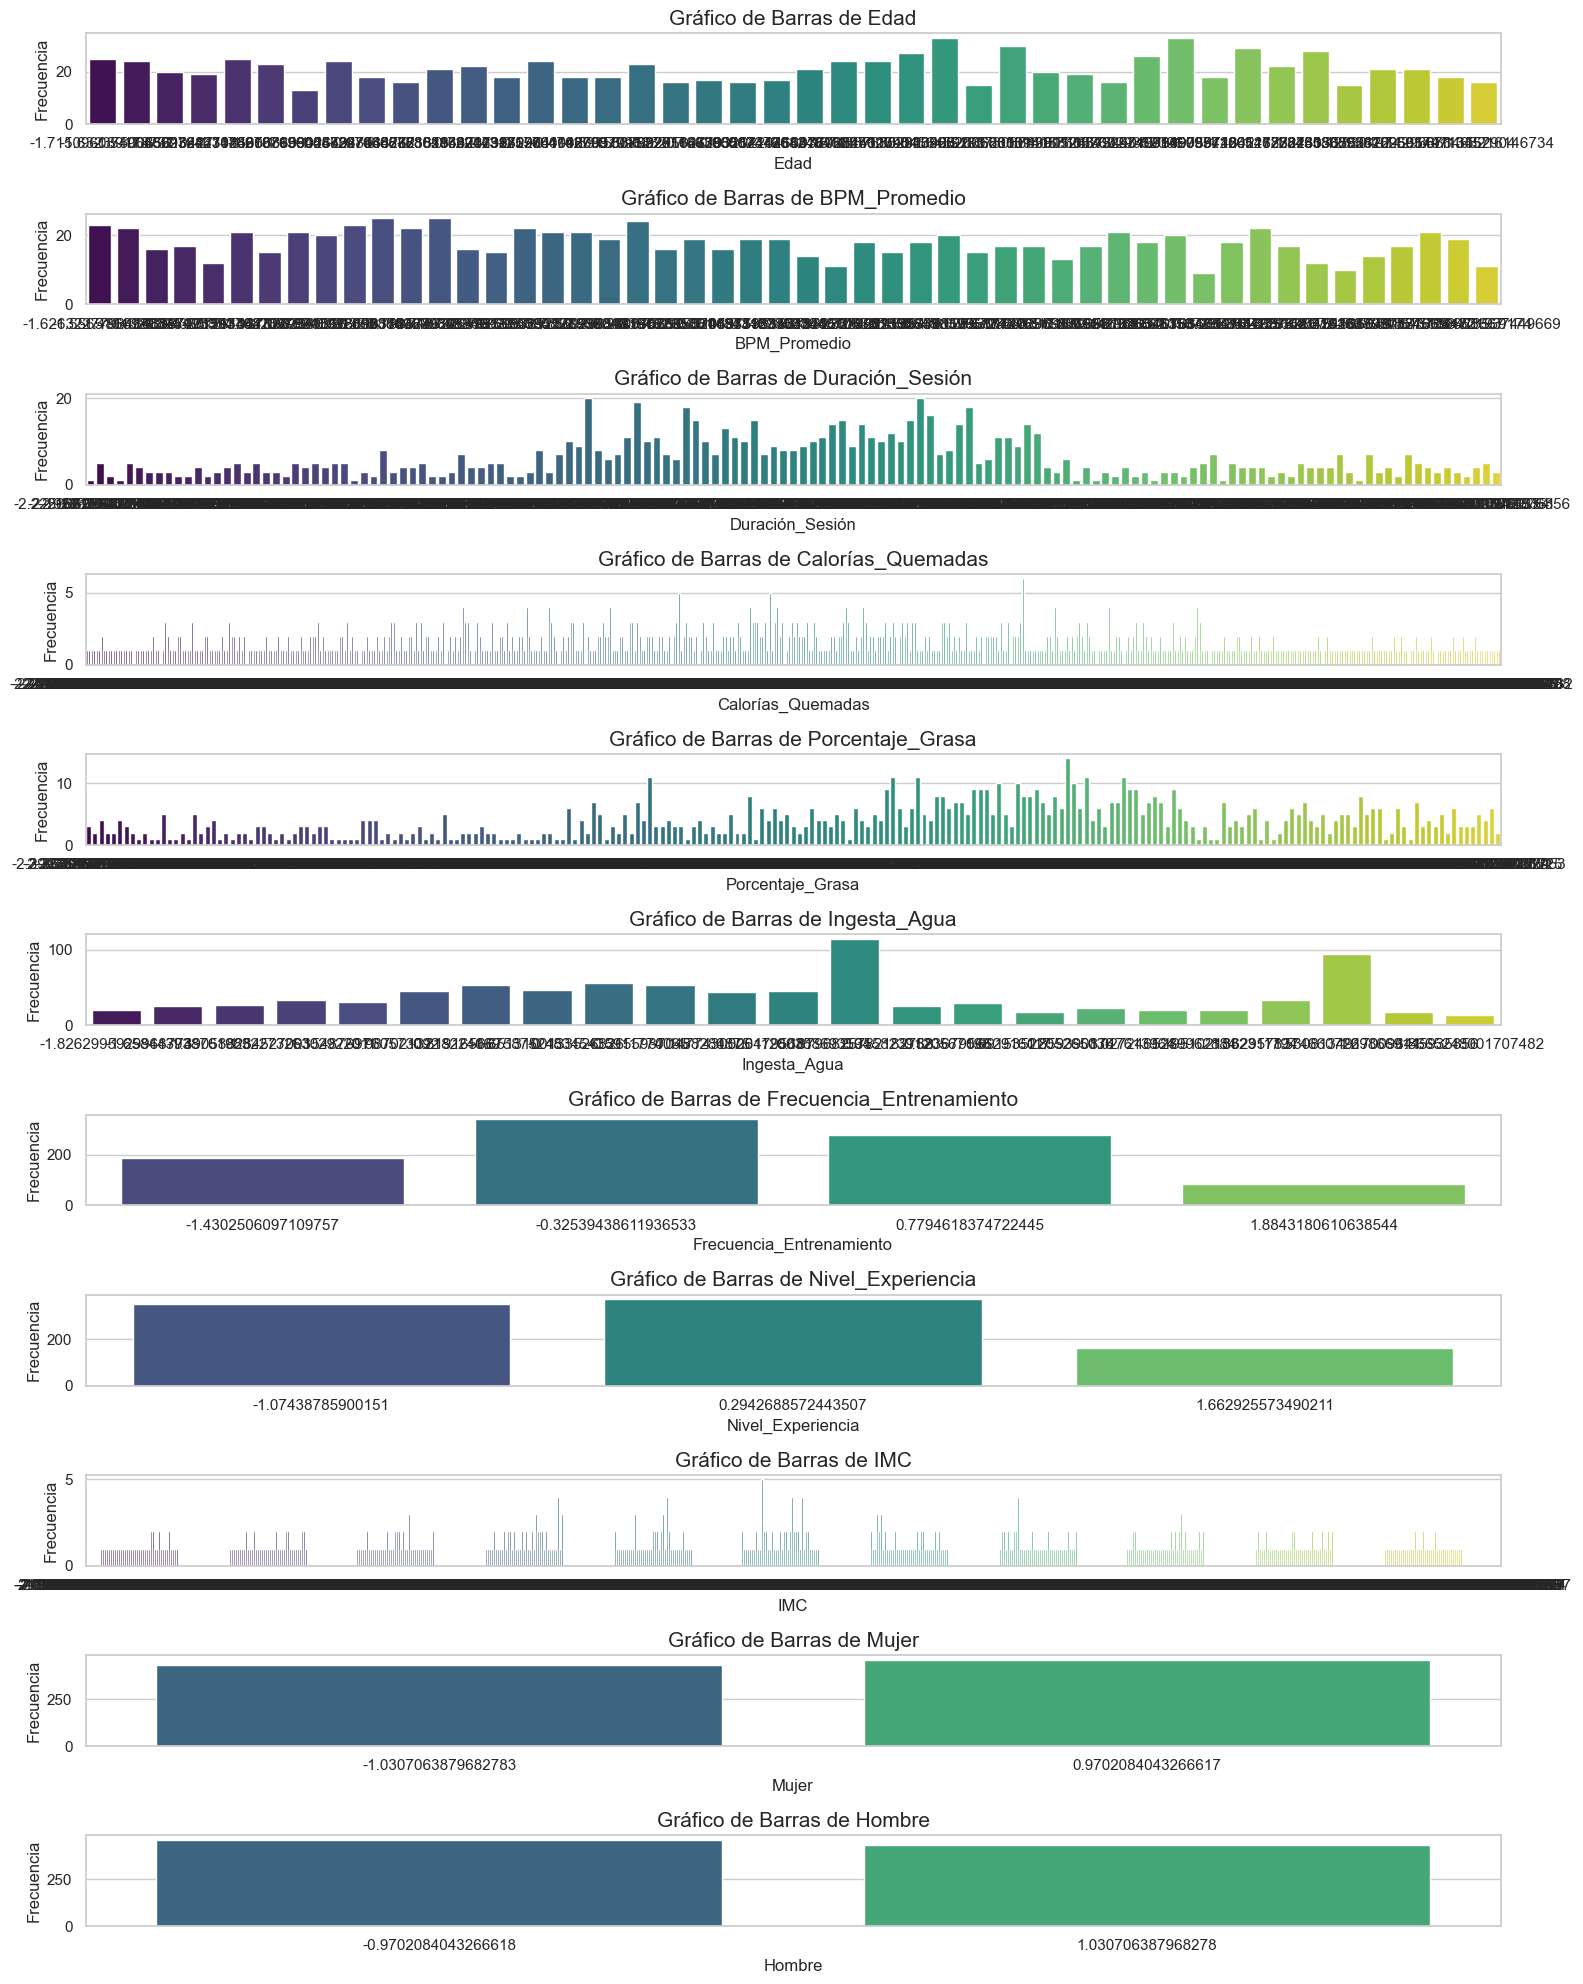

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear la figura y los ejes para histogramas
fig, axes = plt.subplots(nrows=len(df_standar.columns), ncols=1, figsize=(16, 20))

# Crear histogramas para cada variable
for i, column in enumerate(df_standar.columns):
    sns.histplot(df_standar[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Histograma de {column}', fontsize=15)
    axes[i].set_xlabel('Valores', fontsize=12)
    axes[i].set_ylabel('Frecuencia', fontsize=12)

# Ajustar el layout
plt.tight_layout()
plt.show()

# Crear la figura y los ejes para gráficos de dispersión
fig, axes = plt.subplots(nrows=len(df_standar.columns)-1, ncols=1, figsize=(16, 20))

# Crear gráficos de dispersión para cada par de variables consecutivas
for i in range(len(df_standar.columns)-1):
    sns.scatterplot(x=df_standar.columns[i], y=df_standar.columns[i+1], data=df_standar, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Dispersión entre {df_standar.columns[i]} y {df_standar.columns[i+1]}', fontsize=15)
    axes[i].set_xlabel(df_standar.columns[i], fontsize=12)
    axes[i].set_ylabel(df_standar.columns[i+1], fontsize=12)

# Ajustar el layout
plt.tight_layout()
plt.show()

# Crear la figura y los ejes para gráficos de barras
fig, axes = plt.subplots(nrows=len(df_standar.columns), ncols=1, figsize=(16, 20))

# Crear gráficos de barras para cada variable
for i, column in enumerate(df_standar.columns):
    sns.barplot(x=df_standar[column].value_counts().index, y=df_standar[column].value_counts().values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Gráfico de Barras de {column}', fontsize=15)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frecuencia', fontsize=12)

# Ajustar el layout
plt.tight_layout()
plt.show()

###### GUARDAR EL DATASET RESULTANTE EN UN CSV

In [81]:
df_standar.to_csv('ple02_transform.csv', index=False) # no guardamos el índice porque no aporta información relevante

## Conclusión Final

En este análisis, hemos llevado a cabo un proceso de limpieza y normalización de datos, seguido de una evaluación detallada de la distribución de las variables y la identificación de valores atípicos.

1. **Integración de Datos**:
   - Se integraron múltiples fuentes de datos para crear un conjunto de datos unificado. Esto permitió una visión más completa y holística del análisis.

2. **Transformación de Variables**:
   - Se aplicaron transformaciones a las variables para mejorar su distribución y adecuarlas a los requisitos de los modelos analíticos. Esto incluyó la aplicación de logaritmos y escalado de variables.

3. **Imputación de Valores Faltantes**:
   - Se implementaron técnicas de imputación para manejar los valores faltantes en el conjunto de datos. Esto aseguró que no se perdiera información valiosa y que el análisis fuera más robusto.

4. **Análisis de Correlación**:
   - Se realizó un análisis de correlación para identificar relaciones significativas entre las variables. Esto ayudó a entender mejor las interacciones y a seleccionar las variables más relevantes para el modelado.

5. **Preparación para Modelado Predictivo**:
   - Se prepararon los datos para el modelado predictivo mediante la creación de conjuntos de entrenamiento y prueba, y la aplicación de técnicas de validación cruzada. Esto garantizó que los modelos desarrollados fueran precisos y generalizables.